In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

import json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

--2020-08-06 04:56:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-08-06 04:56:31 (104 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
truct_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [ ]:
import json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [ ]:
sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

  

In [ ]:
len(sentences)

26709

In [ ]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]



In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)


tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences  = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)


testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)




In [ ]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential(
    [tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(24, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6800 - accuracy: 0.5601 - val_loss: 0.6491 - val_accuracy: 0.6195
Epoch 2/30
625/625 - 2s - loss: 0.4820 - accuracy: 0.8061 - val_loss: 0.3998 - val_accuracy: 0.8326
Epoch 3/30
625/625 - 2s - loss: 0.3290 - accuracy: 0.8677 - val_loss: 0.3579 - val_accuracy: 0.8486
Epoch 4/30
625/625 - 2s - loss: 0.2752 - accuracy: 0.8906 - val_loss: 0.3461 - val_accuracy: 0.8538
Epoch 5/30
625/625 - 2s - loss: 0.2397 - accuracy: 0.9064 - val_loss: 0.3398 - val_accuracy: 0.8581
Epoch 6/30
625/625 - 2s - loss: 0.2114 - accuracy: 0.9179 - val_loss: 0.3570 - val_accuracy: 0.8439
Epoch 7/30
625/625 - 2s - loss: 0.1887 - accuracy: 0.9284 - val_loss: 0.3564 - val_accuracy: 0.8496
Epoch 8/30
625/625 - 2s - loss: 0.1709 - accuracy: 0.9366 - val_loss: 0.3599 - val_accuracy: 0.8544
Epoch 9/30
625/625 - 2s - loss: 0.1555 - accuracy: 0.9437 - val_loss: 0.3918 - val_accuracy: 0.8432
Epoch 10/30
625/625 - 2s - loss: 0.1405 - accuracy: 0.9507 - val_loss: 0.3943 - val_accuracy: 0.8526

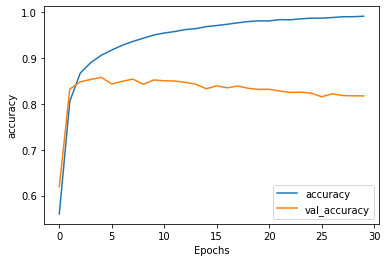

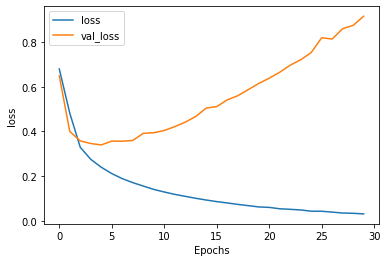

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=truct_type)
print(model.predict(padded).round(2))


[[0.99]
 [0.  ]]
